# Part 1. Tidying

**Note** You must have run `poetry install` to ensure you have the necessary dependencies installed before running code cells.

In [ ]:
# This is some helper code to use in examples.
import random
import time
from datetime import datetime
from typing import Dict, List, Any

class Inventory:
    def __init__(self):
        # Sample inventory with product details
        self._items = {
            "LAPTOP": {
                "price": 999.99,
                "weight": 2.5,
                "stock": 10
            },
            "PHONE": {
                "price": 599.99,
                "weight": 0.5,
                "stock": 20
            },
            "TABLET": {
                "price": 499.99,
                "weight": 1.0,
                "stock": 15
            }
        }

    def get(self, product_id: str, default: Dict = None) -> Dict:
        return self._items.get(product_id, default or {})

    def update_stock(self, product_id: str, quantity: int) -> bool:
        if product_id in self._items:
            self._items[product_id]["stock"] -= quantity
            return True
        return False

def get_tax_rate(state: str) -> float:
    # Simplified tax rates for demonstration
    tax_rates = {
        "CA": 0.0725,
        "NY": 0.0885,
        "TX": 0.0625,
        "FL": 0.06,
    }
    return tax_rates.get(state, 0.07)  # Default to 7% if state not found

def calculate_shipping_cost(shipping_address: str, total_weight: float) -> float:
    # Simple shipping cost calculation
    base_rate = 5.00
    per_pound_rate = 0.50
    return base_rate + (total_weight * per_pound_rate)

def generate_order_id() -> str:
    # Generate a unique order ID using timestamp and random number
    timestamp = int(time.time())
    random_num = random.randint(1000, 9999)
    return f"ORD-{timestamp}-{random_num}"

def process_payment(payment_method: Dict, amount: float) -> bool:
    # Simulate payment processing
    print(f"Processing payment of ${amount:.2f} with {payment_method['type']}")
    # Simulate some payments failing randomly
    success = random.random() > 0.1
    print(f"Payment {'successful' if success else 'failed'}")
    return success

def update_inventory(inventory: Inventory, order_items: List[Dict]) -> None:
    # Update inventory levels
    for item in order_items:
        inventory.update_stock(item['product_id'], item['quantity'])
        print(f"Updated inventory for {item['product_id']}, quantity: -{item['quantity']}")

def send_confirmation_email(email: str, order_id: str) -> None:
    # Simulate sending confirmation email
    print(f"Sending confirmation email to {email} for order {order_id}")

def schedule_delivery(shipping_address: str, order_id: str) -> None:
    # Simulate delivery scheduling
    estimated_date = datetime.now().strftime("%Y-%m-%d")
    print(f"Scheduled delivery to {shipping_address} for order {order_id}")
    print(f"Estimated delivery date: {estimated_date}")

## Chapter 1. Guard Clauses

In [3]:
def is_prime(num: int):
    try:
        num = int(num)
        if num > 1:
            # Check for divisibility
            for i in range(2, int(num**0.5) + 1):
                if num % i == 0:
                    return False
        else:
            return False
        return True
    except (ValueError, TypeError):
        # Handle invalid inputs (strings that can't be converted to int, None, etc.)
        print(f"Error: '{num}' is not a valid input. Please provide an integer.")
        return False


# Example usage:
test_cases = [17, -17, 0, 1, 2, "23", "hello", None, 3.14]

for case in test_cases:
    result = is_prime(case)
    if result is True:
        print(f"{case} is prime")
    elif result is False:
        print(f"{case} is not prime")

17 is prime
-17 is not prime
0 is not prime
1 is not prime
2 is prime
23 is prime
Error: 'hello' is not a valid input. Please provide an integer.
hello is not prime
Error: 'None' is not a valid input. Please provide an integer.
None is not prime
3.14 is prime


def is_valid_num(num: int):
    try: 
        int(num)
        return True
    except (ValueError, TypeError):
        # Handle invalid inputs (strings that can't be converted to int, None, etc.)
        print(f"Error: '{num}' is not a valid input. Please provide an integer.")
        return False
        
def is_prime(n):
    n = int(n) if is_valid_num(n) else 0
    if  n <= 1:
        return False
        
    for i in range(2, int(n**0.5) + 1):
        if n % i == 0:
            return False

    return True
    
# Example usage:
test_cases = [17, -17, 0, 1, 2, "23", "hello", None, 3.14]

for case in test_cases:
    result = is_prime(case)
    if result is True:
        print(f"{case} is prime")
    elif result is False:
        print(f"{case} is not prime")
    # No need for an else statement as errors are handled within the function

## Chapter 2. Dead Code

Delete it!

## Chapter 3. Notmalize Symmetries

In [4]:
class GetSomething:

    def test():
        pass

## Chapter 4. New Interface, Old Implementation

In [5]:
class CrappyInterface:
    def test():
        pass

In [6]:
class NicerInterface:
    def test():
        pass

## Chapter 5. Reading Order

## Chapter 6. Cohesion Order

## Chapter 7. Move Declaration and Initialization Together

## Chapter 8. Explaining Variables

## Chapter 9. Explaining Constants

## Chapter 10. Explicit Parameters

## Chapter 11. Chunk Statements

In [ ]:
def process_customer_order(order_items: List[Dict], customer_info: Dict, inventory: Inventory) -> Dict:
    total = 0
    for item in order_items:
        item_price = inventory.get(item['product_id'], {}).get('price', 0)
        item_quantity = item['quantity']
        total += item_price * item_quantity
    shipping_address = f"{customer_info['street']}, {customer_info['city']}, {customer_info['state']}"
    tax_rate = get_tax_rate(customer_info['state'])
    tax_amount = total * tax_rate
    total_weight = sum(inventory.get(item['product_id'], {}).get('weight', 0) * item['quantity'] for item in order_items)
    shipping_cost = calculate_shipping_cost(shipping_address, total_weight)
    final_total = total + tax_amount + shipping_cost
    order_id = generate_order_id()
    payment_processed = process_payment(customer_info['payment_method'], final_total)
    if payment_processed:
        update_inventory(inventory, order_items)
        send_confirmation_email(customer_info['email'], order_id)
        schedule_delivery(shipping_address, order_id)
    return {
        'order_id': order_id,
        'subtotal': total,
        'tax': tax_amount,
        'shipping': shipping_cost,
        'total': final_total,
        'status': 'processed' if payment_processed else 'failed'
    }


In [ ]:
# Tidied up version of the code above
def process_customer_order(order_items: List[Dict], customer_info: Dict, inventory: Inventory) -> Dict:
    total = 0
    for item in order_items:
        item_price = inventory.get(item['product_id'], {}).get('price', 0)
        item_quantity = item['quantity']
        total += item_price * item_quantity

    shipping_address = f"{customer_info['street']}, {customer_info['city']}, {customer_info['state']}"
    tax_rate = get_tax_rate(customer_info['state'])
    tax_amount = total * tax_rate
    total_weight = sum(inventory.get(item['product_id'], {}).get('weight', 0) * item['quantity'] for item in order_items)
    shipping_cost = calculate_shipping_cost(shipping_address, total_weight)
    final_total = total + tax_amount + shipping_cost

    order_id = generate_order_id()
    payment_processed = process_payment(customer_info['payment_method'], final_total)

    if payment_processed:
        update_inventory(inventory, order_items)
        send_confirmation_email(customer_info['email'], order_id)
        schedule_delivery(shipping_address, order_id)

    return {
        'order_id': order_id,
        'subtotal': total,
        'tax': tax_amount,
        'shipping': shipping_cost,
        'total': final_total,
        'status': 'processed' if payment_processed else 'failed'
    }

## Chapter 12. Extract Helper

In [ ]:
from typing import Tuple


def calculate_subtotal(order_items: List[Dict], inventory: Inventory) -> float:
    """Helper to calculate the pre-tax, pre-shipping total"""
    return sum(
        inventory.get(item['product_id'], {}).get('price', 0) * item['quantity']
        for item in order_items
    )

def calculate_total_weight(order_items: List[Dict], inventory: Inventory) -> float:
    """Helper to calculate total weight of all items"""
    return sum(
        inventory.get(item['product_id'], {}).get('weight', 0) * item['quantity']
        for item in order_items
    )

def calculate_shipping_cost(total_weight: float) -> float:
    """Calculate shipping cost based on weight"""
    base_rate = 5.00
    per_pound_rate = 0.50
    return base_rate + (total_weight * per_pound_rate)

def calculate_order_totals(order_items: List[Dict], inventory: Inventory, tax_rate: float) -> Tuple[float, float, float, float]:
    """
    Helper to calculate all monetary aspects of the order.
    Returns (subtotal, tax_amount, shipping_cost, final_total)
    """
    subtotal = calculate_subtotal(order_items, inventory)
    tax_amount = subtotal * tax_rate
    total_weight = calculate_total_weight(order_items, inventory)
    shipping_cost = calculate_shipping_cost(total_weight)
    final_total = subtotal + tax_amount + shipping_cost

    return subtotal, tax_amount, shipping_cost, final_total

def format_shipping_address(customer_info: Dict) -> str:
    """Helper to consistently format shipping addresses"""
    return f"{customer_info['street']}, {customer_info['city']}, {customer_info['state']}"

def handle_successful_order(order_id: str, customer_info: Dict, order_items: List[Dict], inventory: Inventory) -> None:
    """Helper to handle all post-payment success actions"""
    shipping_address = format_shipping_address(customer_info)
    update_inventory(inventory, order_items)
    send_confirmation_email(customer_info['email'], order_id)
    schedule_delivery(shipping_address, order_id)

def process_customer_order(order_items: List[Dict], customer_info: Dict, inventory: Inventory) -> Dict:
    # Calculate all order totals
    subtotal, tax_amount, shipping_cost, final_total = calculate_order_totals(
        order_items,
        inventory,
        get_tax_rate(customer_info['state'])
    )

    # Process order and payment
    order_id = generate_order_id()
    payment_processed = process_payment(customer_info['payment_method'], final_total)

    # Handle post-payment actions
    if payment_processed:
        handle_successful_order(order_id, customer_info, order_items, inventory)

    return {
        'order_id': order_id,
        'subtotal': subtotal,
        'tax': tax_amount,
        'shipping': shipping_cost,
        'total': final_total,
        'status': 'processed' if payment_processed else 'failed'
    }

In [9]:
# Testing

inventory = Inventory()

order_items = [
    {"product_id": "LAPTOP", "quantity": 1},
    {"product_id": "PHONE", "quantity": 2}
]

customer_info = {
    "name": "John Doe",
    "email": "john.doe@example.com",
    "street": "123 Main St",
    "city": "San Francisco",
    "state": "CA",
    "payment_method": {
        "type": "credit_card",
        "number": "****-****-****-1234"
    }
}

result = process_customer_order(order_items, customer_info, inventory)

print("\nOrder Summary:")
for key, value in result.items():
    if isinstance(value, float):
        print(f"{key.title()}: ${value:.2f}")
    else:
        print(f"{key.title()}: {value}")

Processing payment of $2366.22 with credit_card
Payment successful
Updated inventory for LAPTOP, quantity: -1
Updated inventory for PHONE, quantity: -2
Sending confirmation email to john.doe@example.com for order ORD-1729733442-8279
Scheduled delivery to 123 Main St, San Francisco, CA for order ORD-1729733442-8279
Estimated delivery date: 2024-10-23

Order Summary:
Order_Id: ORD-1729733442-8279
Subtotal: $2199.97
Tax: $159.50
Shipping: $6.75
Total: $2366.22
Status: processed


## Chapter 13. One Pile

In [ ]:
class Product:
    def __init__(self, id, name, base_price, category, weight):
        self.id = id
        self.name = name
        self.base_price = base_price
        self.category = category
        self.weight = weight

def calc_base(product, qty):
    return product.base_price * qty

def calc_cat_mult(cat):
    if cat == "electronics":
        return 1.2
    if cat == "books":
        return 1.0
    if cat == "clothing":
        return 1.1
    return 1.0

def calc_weight_cost(w):
    if w <= 1:
        return 5
    if w <= 5:
        return 10
    if w <= 10:
        return 15
    return 20

# Repeated conditionals
def get_shipping_mult(weight, distance, is_express):
    base = calc_weight_cost(weight)
    if is_express:
        if distance < 50:
            return base * 1.5
        if distance < 100:
            return base * 2.0
        return base * 2.5
    else:
        if distance < 50:
            return base * 1.0
        if distance < 100:
            return base * 1.2
        return base * 1.4

# Repeated conditionals
def calc_distance_fee(dist):
    if dist < 50:
        return 0
    if dist < 100:
        return 5
    return 10

def apply_bulk_discount(q):
    if q >= 100:
        return 0.7
    if q >= 50:
        return 0.8
    if q >= 20:
        return 0.9
    if q >= 10:
        return 0.95
    return 1.0

def seasonal_multiplier(month, cat):
    if cat == "clothing":
        if month in [12, 1, 2]:
            return 1.2
        if month in [6, 7, 8]:
            return 0.8
    if cat == "electronics":
        if month == 11:
            return 0.8
        if month == 12:
            return 0.9
    return 1.0

# long argument list
def calculate_final_price(prod, quantity, distance, is_express, month):
    base = calc_base(prod, quantity)
    cat_mult = calc_cat_mult(prod.category)
    weight_total = prod.weight * quantity
    shipping = get_shipping_mult(weight_total, distance, is_express)
    dist_fee = calc_distance_fee(distance)
    bulk_disc = apply_bulk_discount(quantity)
    season_mult = seasonal_multiplier(month, prod.category)

    subtotal = base * cat_mult * bulk_disc * season_mult
    shipping_total = shipping + dist_fee

    return subtotal + shipping_total

In [ ]:
class Product:
    def __init__(self, id, name, base_price, category, weight):
        self.id = id
        self.name = name
        self.base_price = base_price
        self.category = category
        self.weight = weight

class PriceCalculator:
    def __init__(self, product, quantity, shipping_config):
        self.product = product
        self.quantity = quantity
        self.shipping_config = shipping_config

    def calculate_price(self):
        subtotal = self.product.base_price * self.quantity
        category_multipliers = {
            "electronics": 1.2,
            "books": 1.0,
            "clothing": 1.1
        }
        subtotal *= category_multipliers.get(self.product.category, 1.0)

        if self.quantity >= 100:
            subtotal *= 0.7
        elif self.quantity >= 50:
            subtotal *= 0.8
        elif self.quantity >= 20:
            subtotal *= 0.9
        elif self.quantity >= 10:
            subtotal *= 0.95

        month = self.shipping_config['month']
        if self.product.category == "clothing":
            if month in [12, 1, 2]:
                subtotal *= 1.2
            elif month in [6, 7, 8]:
                subtotal *= 0.8
        elif self.product.category == "electronics":
            if month == 11:
                subtotal *= 0.8
            elif month == 12:
                subtotal *= 0.9

        shipping_cost = self._calculate_shipping_cost()

        return subtotal + shipping_cost

    def _calculate_shipping_cost(self):
        distance = self.shipping_config['distance']
        is_express = self.shipping_config['is_express']
        total_weight = self.product.weight * self.quantity

        if total_weight <= 1:
            base_shipping = 5
        elif total_weight <= 5:
            base_shipping = 10
        elif total_weight <= 10:
            base_shipping = 15
        else:
            base_shipping = 20

        if is_express:
            if distance < 50:
                base_shipping *= 1.5
            elif distance < 100:
                base_shipping *= 2.0
            else:
                base_shipping *= 2.5
        else:
            if distance < 50:
                base_shipping *= 1.0
            elif distance < 100:
                base_shipping *= 1.2
            else:
                base_shipping *= 1.4

        if distance >= 100:
            base_shipping += 10
        elif distance >= 50:
            base_shipping += 5

        return base_shipping

## Chapter 14. Explaining Comments

In [ ]:
class Product:
    def __init__(self, id, name, base_price, category, weight):
        self.id = id
        self.name = name
        self.base_price = base_price
        self.category = category
        self.weight = weight

class PriceCalculator:
    def __init__(self, product, quantity, shipping_config):
        self.product = product
        self.quantity = quantity
        self.shipping_config = shipping_config

    def calculate_price(self):
        # First calculate the base product price with all product-related adjustments
        subtotal = self.product.base_price * self.quantity

        # Apply category-specific pricing
        category_multipliers = {
            "electronics": 1.2,
            "books": 1.0,
            "clothing": 1.1
        }
        subtotal *= category_multipliers.get(self.product.category, 1.0)

        # Apply quantity discounts
        if self.quantity >= 100:
            subtotal *= 0.7
        elif self.quantity >= 50:
            subtotal *= 0.8
        elif self.quantity >= 20:
            subtotal *= 0.9
        elif self.quantity >= 10:
            subtotal *= 0.95

        # Apply seasonal adjustments
        month = self.shipping_config['month']
        if self.product.category == "clothing":
            if month in [12, 1, 2]:  # winter clothing premium
                subtotal *= 1.2
            elif month in [6, 7, 8]:  # summer clearance
                subtotal *= 0.8
        elif self.product.category == "electronics":
            if month == 11:  # Black Friday
                subtotal *= 0.8
            elif month == 12:  # Holiday season
                subtotal *= 0.9

        # Calculate shipping costs
        shipping_cost = self._calculate_shipping_cost()

        return subtotal + shipping_cost

    def _calculate_shipping_cost(self):
        distance = self.shipping_config['distance']
        is_express = self.shipping_config['is_express']
        total_weight = self.product.weight * self.quantity

        # Calculate base shipping cost by weight
        if total_weight <= 1:
            base_shipping = 5
        elif total_weight <= 5:
            base_shipping = 10
        elif total_weight <= 10:
            base_shipping = 15
        else:
            base_shipping = 20

        # Apply distance and service level multipliers
        if is_express:
            if distance < 50:
                base_shipping *= 1.5
            elif distance < 100:
                base_shipping *= 2.0
            else:
                base_shipping *= 2.5
        else:
            if distance < 50:
                base_shipping *= 1.0
            elif distance < 100:
                base_shipping *= 1.2
            else:
                base_shipping *= 1.4

        # Add distance fee
        if distance >= 100:
            base_shipping += 10
        elif distance >= 50:
            base_shipping += 5

        return base_shipping

## Chapter 15. Delete Redundant Comments

In [ ]:
if (generator)
    # ...a bunch of lines of code to set up the generator...
else
    # no generator, return the default
    return getDefaultGenerator()

# After tidying with a guard clause, the code looks like this:

if (! generator)
    # no generator, return the default
    return getDefaultGenerator()

# ...a bunch of lines of code to set up the generator...


# Part 2. Managing

- When do you start tidying? 
- When do you stop tidying? 
- How do you combine tidying, changing the structure of the code, with changing the behavior of the system?

## Chapter 16. Separate Tidying

Example problem:

- I put my tidyings in with my behavior changes. 
- Reviewers complain that my PRs are too long. 
- I separate the tidyings into their own PRs, either before (more likely) or after the behavior changes. 
- Reviewers complain that the tidying PRs are pointless. 
- Go to 1.

Tiny changes invite better feedback.

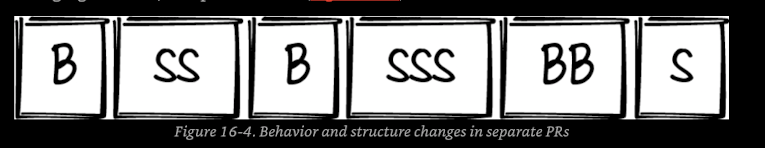

- review latency
- feedback loop


## Chapter 17. Chaining

- Core Concept: Small tidying steps often cascade into additional opportunities for improvement, but it's important to manage this urge and stay focused on small, controlled steps.
- Common Chains - Examples of how one tidying leads to another:
    - After adding a guard clause → You might extract it into a helper function
    - After removing dead code → Code organization becomes clearer
    - After normalizing similar code → You might group related items together
    - After extracting variables → You might turn them into helper functions
    - After chunking code blocks → You might add explanatory comments or extract helpers
    - After making parameters explicit → You might see opportunities for new abstractions
- Important Caution: While chaining tidying steps is natural and beneficial, the author warns against trying to do too much too quickly. A failed large refactoring is more expensive than several successful small ones.
- Communication Focus: The ultimate goal is making code more understandable, since:
    - Understanding code is the biggest cost in software development
    - Change is the dominant cost overall
    - Code should communicate its structure and intent clearly
    - While comments are valuable, explore how code itself can communicate meaning
- Practical Advice:
    - Practice individual tidying steps like musical notes
    - Once comfortable with individual steps, combine them like forming melodies
    - Stay alert for larger design improvements that emerge from small tidying steps
    - Some of the best abstractions come from running code, not upfront design

## Chapter 18. Batch Sizes

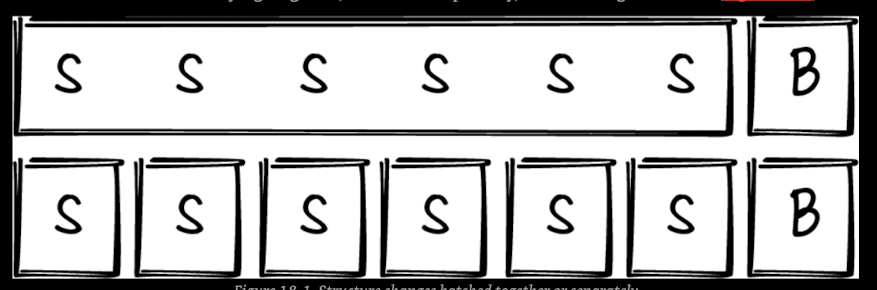

The Goldilocks Dilemma: Finding the right batch size for your tidying work is a balancing act. Too small and you'll be overwhelmed by the number of PRs; too large and you'll be overwhelmed by the complexity of the changes.

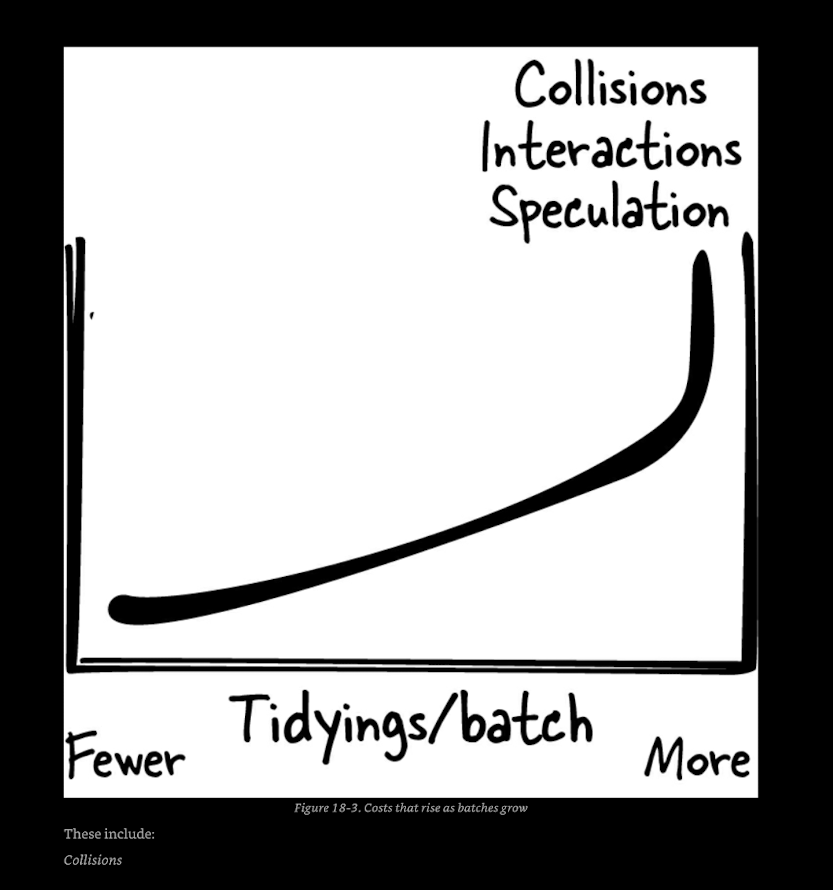

> Numbers are used for intuition but not factual accuracy.

- Interactions
- Speculations

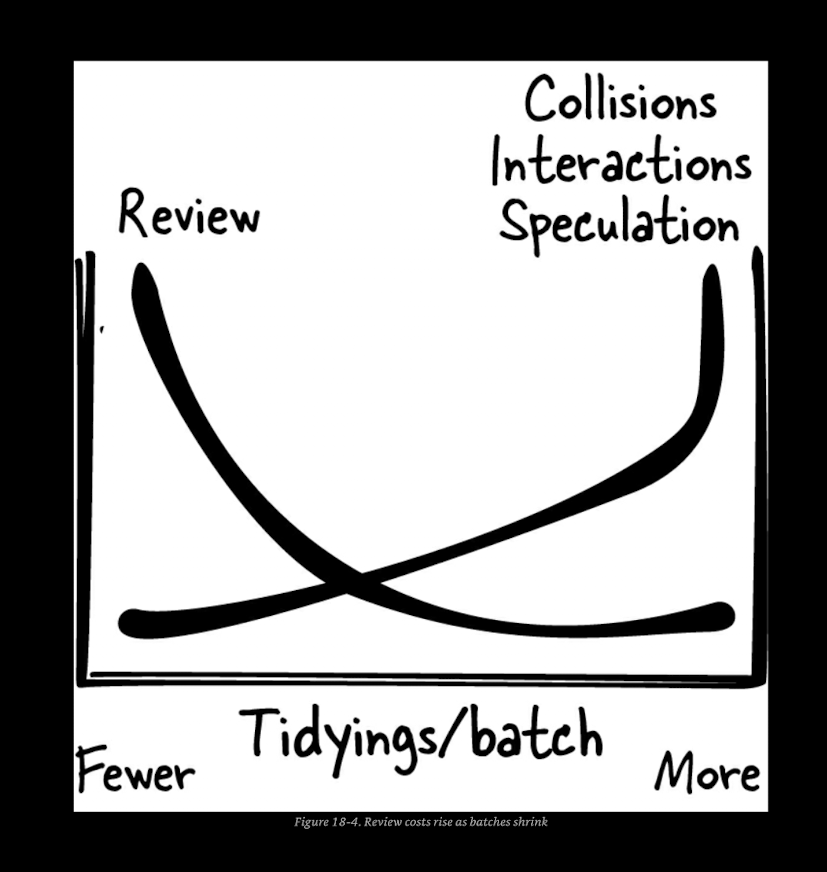

> Reduce cost of review

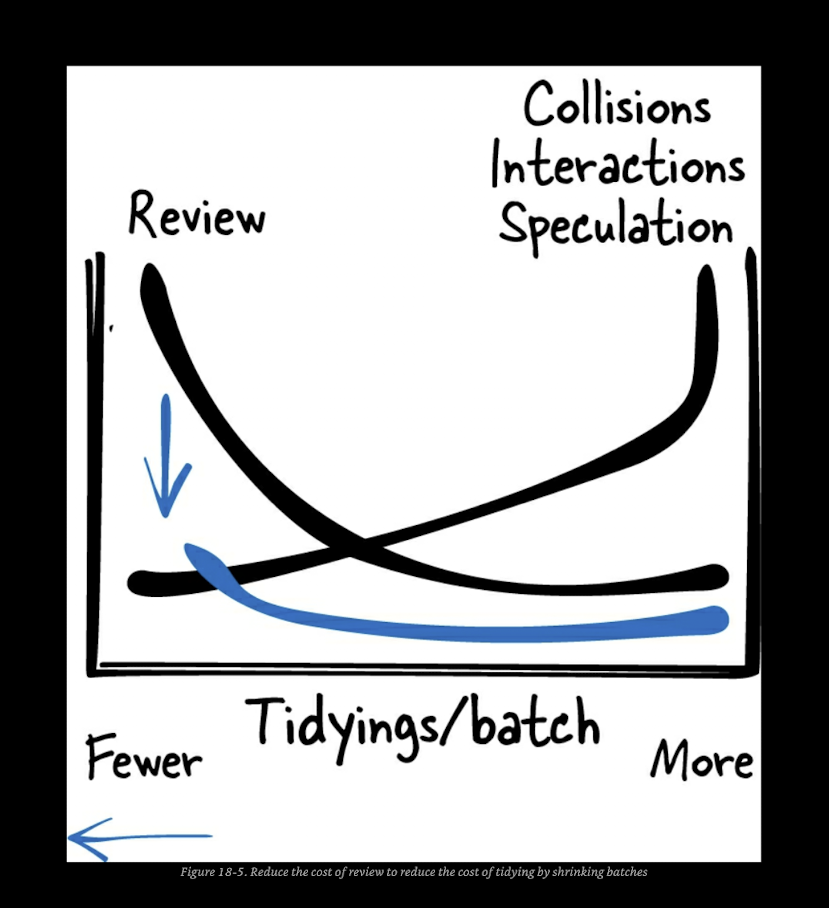

- trust
- strong culture


## Chapter 19. Rhythm

- the more tidy the code, the smaller the less time required to tidy, usually
- pave the path
- 80/20 rule
- minutes-to-an-hour

Behaviour changes will eventually almost always happen in tidied code. 

## Chapter 20. Getting Untangled

- Tidy + behavior change together when solving a solution
- Results in tangled code

Need to decide how to proceed.

- Existing code hard to review but less work to push it
- Untangle the existing code
- Tidy first i.e. discard and start over

> The sunk cost fallacy

Code is about explaining your intention to the computer and to other people.

> The shorted path to instructing a computer is not an interesting end goal. 

## Chapter 21. First, After, Later, Never

### Never

If the behaviour wil never change.

> If it ain't broke, don't fix it.

### Later

 - adhoc tidying
 - good for learning
 - good in between tasks

 ### After

 - if you're likely to change the code again soon
 - if it's cheap i.e. less or similar cost to the previous behaviour change

### First

- will it make things easier?
- will the help be immediate?
- are you sure about the tidying?


# Part III. Theory